In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../")

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import numpy as np
import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader

from kaggle_data_utils import build_dataset
from sklearn.model_selection import train_test_split

from tqdm import trange
import matplotlib.pyplot as plt

In [3]:
trainX, trainY = build_dataset(relative_path="..", normalize=True, one_hot_labels=True)
trainX, valX, trainY, valY = train_test_split(trainX, trainY, test_size=0.2)
print(trainX.shape, trainY.shape, valX.shape, valY.shape)

(810, 9) (810,) (203, 9) (203,)


In [4]:
trainX, trainY = torch.from_numpy(trainX).float(), torch.from_numpy(trainY).long()
valX, valY = torch.from_numpy(valX).float(), torch.from_numpy(valY).long()

train_set = TensorDataset(trainX, trainY)
val_set = TensorDataset(valX, valY)

train_loader = DataLoader(train_set, batch_size=32, shuffle=True)
val_loader = DataLoader(val_set, batch_size=32)

In [5]:
model = nn.Sequential(
    nn.Linear(9, 9),
    nn.ReLU(),
    nn.Linear(9, 2),
    nn.ReLU()
)

In [6]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=0.1)

In [7]:
# From https://pytorch.org/tutorials/beginner/basics/optimization_tutorial.html

def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    losses = []
    
    buffer = []
    for batch, (X, y) in enumerate(dataloader):
        optimizer.zero_grad()
        
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)
        buffer.append(loss.item())

        # Backpropagation
        loss.backward()
        optimizer.step()

        if batch % 10 == 0:
            loss, current = np.mean(buffer), batch * len(X)
            buffer = []
            losses.append(loss)
    return losses

def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= size
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [8]:
epochs = 100
loss_history = []
for t in trange(epochs):
    losses = train_loop(train_loader, model, loss_fn, optimizer)
    loss_history.extend(losses)
    if t % 10 == 0:
        test_loop(val_loader, model, loss_fn)
print("Done!")

  9%|▉         | 9/100 [00:00<00:02, 42.18it/s]

Test Error: 
 Accuracy: 64.0%, Avg loss: 0.022594 



 19%|█▉        | 19/100 [00:00<00:01, 41.93it/s]

Test Error: 
 Accuracy: 72.9%, Avg loss: 0.019647 



 29%|██▉       | 29/100 [00:00<00:01, 42.53it/s]

Test Error: 
 Accuracy: 71.9%, Avg loss: 0.019611 



 34%|███▍      | 34/100 [00:00<00:01, 38.91it/s]

Test Error: 
 Accuracy: 71.4%, Avg loss: 0.019529 



 47%|████▋     | 47/100 [00:01<00:01, 36.92it/s]

Test Error: 
 Accuracy: 71.4%, Avg loss: 0.019518 



 55%|█████▌    | 55/100 [00:01<00:01, 35.47it/s]

Test Error: 
 Accuracy: 71.9%, Avg loss: 0.019728 



 68%|██████▊   | 68/100 [00:01<00:00, 36.81it/s]

Test Error: 
 Accuracy: 72.4%, Avg loss: 0.019739 



 76%|███████▌  | 76/100 [00:02<00:00, 34.57it/s]

Test Error: 
 Accuracy: 71.9%, Avg loss: 0.019749 



 85%|████████▌ | 85/100 [00:02<00:00, 35.94it/s]

Test Error: 
 Accuracy: 71.9%, Avg loss: 0.019623 



100%|██████████| 100/100 [00:02<00:00, 37.67it/s]

Test Error: 
 Accuracy: 71.9%, Avg loss: 0.019599 

Done!


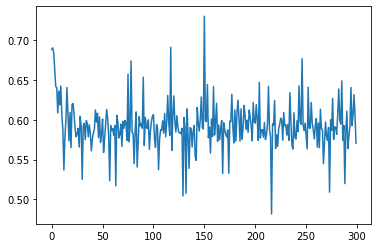

In [9]:
plt.plot(loss_history)

In [12]:
torch.save(model, "nn.mdl")

# No Seed

In [13]:
trainX, trainY = build_dataset(relative_path="..", normalize=True, one_hot_labels=True)
trainX = trainX[:, 1:]

trainX, valX, trainY, valY = train_test_split(trainX, trainY, test_size=0.2)
print(trainX.shape, trainY.shape, valX.shape, valY.shape)

(810, 8) (810,) (203, 8) (203,)


In [14]:
trainX, trainY = torch.from_numpy(trainX).float(), torch.from_numpy(trainY).long()
valX, valY = torch.from_numpy(valX).float(), torch.from_numpy(valY).long()

train_set = TensorDataset(trainX, trainY)
val_set = TensorDataset(valX, valY)

train_loader = DataLoader(train_set, batch_size=32, shuffle=True)
val_loader = DataLoader(val_set, batch_size=32)

In [15]:
model = nn.Sequential(
    nn.Linear(8, 8),
    nn.ReLU(),
    nn.Linear(8, 2),
    nn.ReLU()
)

In [16]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=0.1)

In [17]:
epochs = 100
loss_history = []
for t in trange(epochs):
    losses = train_loop(train_loader, model, loss_fn, optimizer)
    loss_history.extend(losses)
    if t % 10 == 0:
        test_loop(val_loader, model, loss_fn)
print("Done!")

  5%|▌         | 5/100 [00:00<00:03, 25.98it/s]

Test Error: 
 Accuracy: 54.2%, Avg loss: 0.023040 



 14%|█▍        | 14/100 [00:00<00:02, 29.41it/s]

Test Error: 
 Accuracy: 67.0%, Avg loss: 0.020502 



 28%|██▊       | 28/100 [00:00<00:02, 31.11it/s]

Test Error: 
 Accuracy: 66.0%, Avg loss: 0.020639 



 36%|███▌      | 36/100 [00:01<00:01, 33.27it/s]

Test Error: 
 Accuracy: 67.0%, Avg loss: 0.020376 



 46%|████▌     | 46/100 [00:01<00:01, 36.71it/s]

Test Error: 
 Accuracy: 66.5%, Avg loss: 0.020621 



 58%|█████▊    | 58/100 [00:01<00:01, 34.83it/s]

Test Error: 
 Accuracy: 67.0%, Avg loss: 0.020803 



 66%|██████▌   | 66/100 [00:02<00:00, 35.76it/s]

Test Error: 
 Accuracy: 67.5%, Avg loss: 0.020615 



 79%|███████▉  | 79/100 [00:02<00:00, 38.83it/s]

Test Error: 
 Accuracy: 67.5%, Avg loss: 0.020675 



 87%|████████▋ | 87/100 [00:02<00:00, 37.76it/s]

Test Error: 
 Accuracy: 67.5%, Avg loss: 0.020614 



 95%|█████████▌| 95/100 [00:02<00:00, 36.78it/s]

Test Error: 
 Accuracy: 66.5%, Avg loss: 0.020708 



100%|██████████| 100/100 [00:02<00:00, 34.09it/s]

Done!


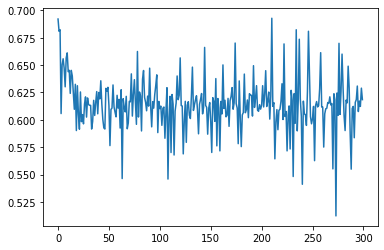

In [18]:
plt.plot(loss_history)

In [19]:
torch.save(model, "nn-noseed.mdl")